In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

Reading Data

In [ ]:
df=pd.read_csv('50_Startups.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Axes: >

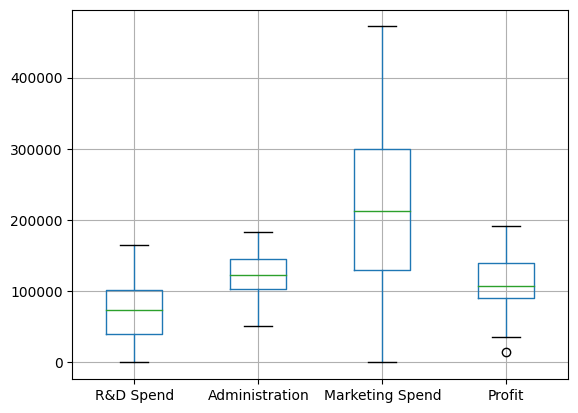

In [ ]:
df.boxplot()

Dropping non Contributing Features

In [ ]:
X=df.drop('State', axis=1)
X

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


Preprocessing The whole dataset
*   Use Minmax Scaler

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
print(X)

[[1.         0.65174393 1.         1.        ]
 [0.98335946 0.76197173 0.94089337 0.99735461]
 [0.92798459 0.37957895 0.8646636  0.99317808]
 [0.87313643 0.51299839 0.81223513 0.94729239]
 [0.85943772 0.30532804 0.77613557 0.85317138]
 [0.797566   0.3694479  0.76912588 0.80138177]
 [0.81412828 0.73016111 0.27071031 0.79649041]
 [0.7880179  0.71745725 0.68649342 0.79440736]
 [0.72901786 0.74173276 0.66049977 0.77446805]
 [0.74590551 0.43692884 0.64644319 0.7606613 ]
 [0.61635061 0.45150637 0.48573267 0.74017475]
 [0.60884455 0.30836422 0.52936195 0.72968626]
 [0.56766982 0.57883556 0.52956308 0.71462897]
 [0.55635219 0.64106561 0.53555202 0.67364377]
 [0.72539353 0.8013272  0.54370828 0.66404417]
 [0.69261666 0.54302973 0.55486446 0.64892083]
 [0.47180821 0.53527036 0.56031151 0.63245443]
 [0.57246821 0.71401273 0.59894835 0.62331739]
 [0.55488118 0.47877201 0.62511553 0.61710347]
 [0.52264964 0.77823604 0.         0.60871268]
 [0.46116861 0.47642362 0.63305328 0.58448237]
 [0.47408436 

Data Split

In [ ]:
y = df['Profit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Model Fitting and Pipelining

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting and Evaluation

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
#R2_score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.2543730133954767e-11


In [ ]:
#MSE
print(mean_squared_error(y_test,y_pred))

5.082197683525802e-22
